In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\ritik\Downloads\Fraud.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df[df['isFraud']==1]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


## Null vales check

In [7]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Show basic info: data types & non-null counts
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Shape of the dataset: (6362620, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

Missing values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


## EDA

In [8]:
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


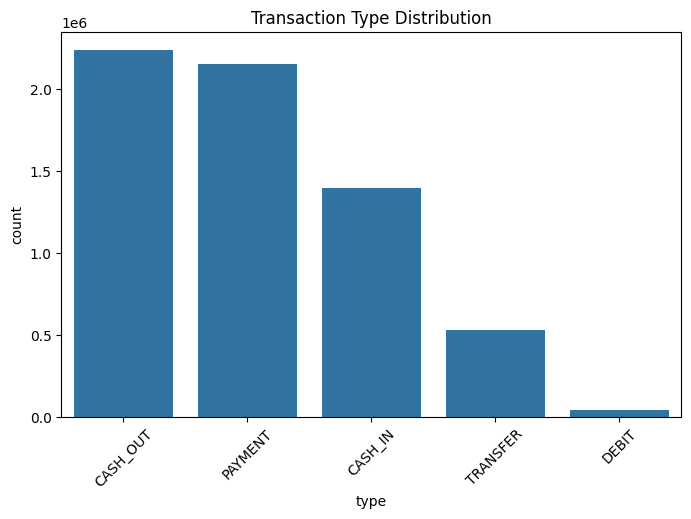

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of each transaction type
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45)
plt.show()


Non-Fraud Count: 6354407
Fraud Count: 8213


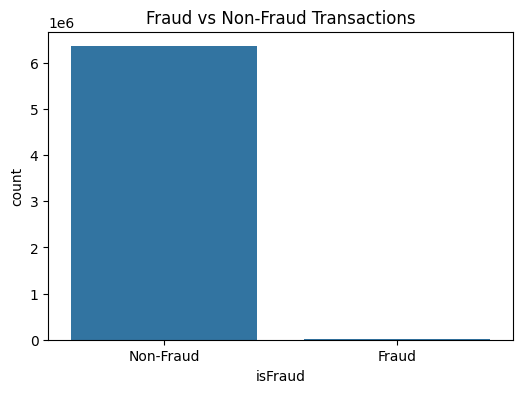

In [10]:
## Fraud vs Non-Fraud Count
# Count of fraud and non-fraud cases
# Count values
fraud_counts = df['isFraud'].value_counts()
print("Non-Fraud Count:", fraud_counts[0])
print("Fraud Count:", fraud_counts[1])

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


it is an imbalanced dataset

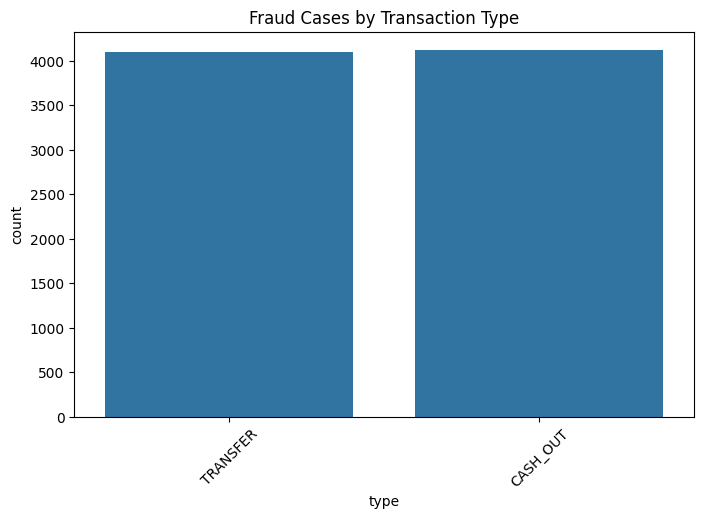

In [11]:
## Fraud Count by Transaction Type
# Only fraud transactions
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df[df['isFraud']==1])
plt.title('Fraud Cases by Transaction Type')
plt.xticks(rotation=45)
plt.show()


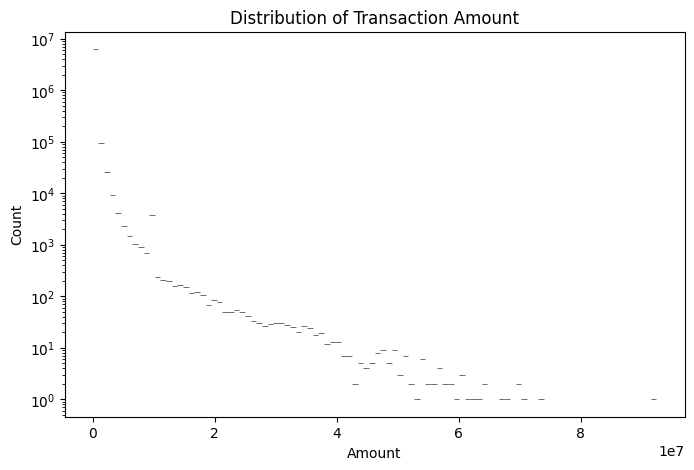

In [12]:
## Distribution of Transaction Amount (log scale)
# Plot with log scale due to skew
plt.figure(figsize=(8,5))
sns.histplot(df['amount'], bins=100, log_scale=(False, True))
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.show()


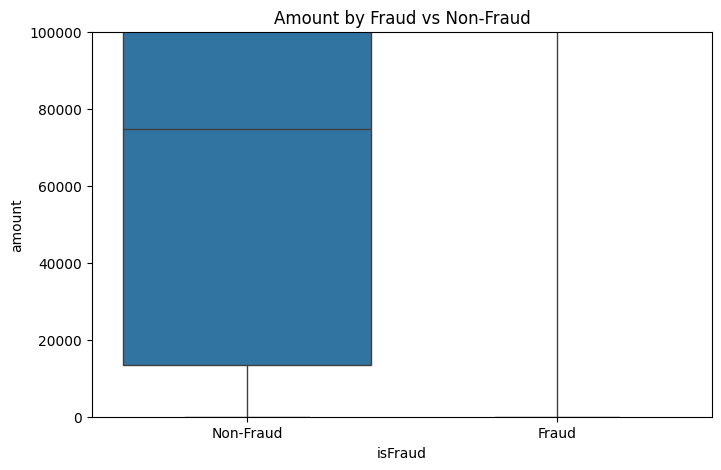

In [13]:
##  Boxplot of Amount by Fraud Status
# Boxplot by fraud
plt.figure(figsize=(8,5))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Amount by Fraud vs Non-Fraud')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylim(0, 100000)  # limit to focus on most values
plt.show()


In [14]:
# Compare transaction amount statistics for fraud vs non-fraud
print("Non-Fraud Amount Stats:")
print(df[df['isFraud'] == 0]['amount'].describe())

print("\nFraud Amount Stats:")
print(df[df['isFraud'] == 1]['amount'].describe())

Non-Fraud Amount Stats:
count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

Fraud Amount Stats:
count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64


Fraud Rate by Transaction Type (%):
 type
TRANSFER    0.768799
CASH_OUT    0.183955
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


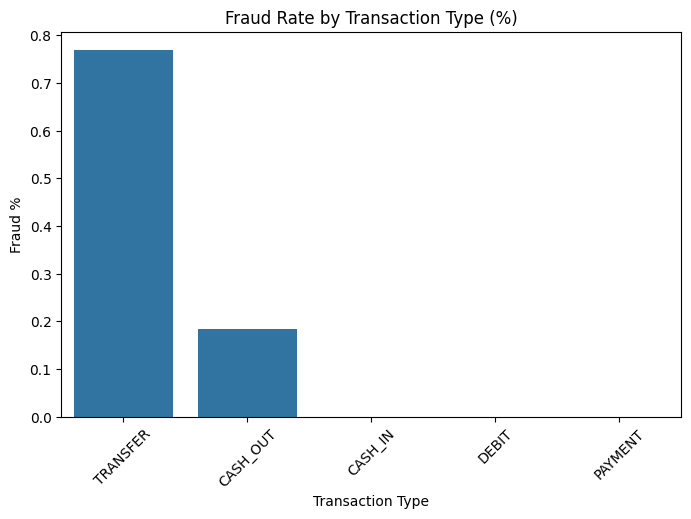

In [15]:
# Fraud rate by transaction type
fraud_rate = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
print("Fraud Rate by Transaction Type (%):\n", fraud_rate * 100)

# Barplot
plt.figure(figsize=(8,5))
sns.barplot(x=fraud_rate.index, y=fraud_rate.values * 100)
plt.title('Fraud Rate by Transaction Type (%)')
plt.ylabel('Fraud %')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45)
plt.show()


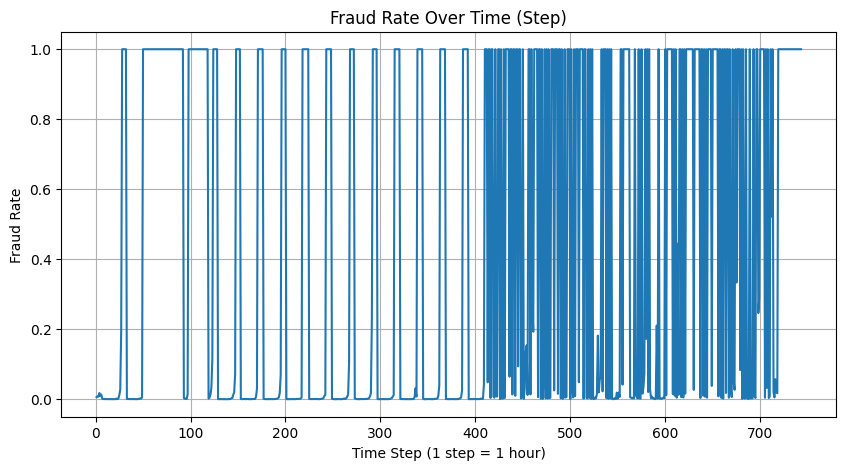

In [16]:
# Fraud count per time step (hour)
fraud_by_step = df.groupby('step')['isFraud'].mean()

# Line plot
plt.figure(figsize=(10,5))
fraud_by_step.plot()
plt.title('Fraud Rate Over Time (Step)')
plt.xlabel('Time Step (1 step = 1 hour)')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.show()


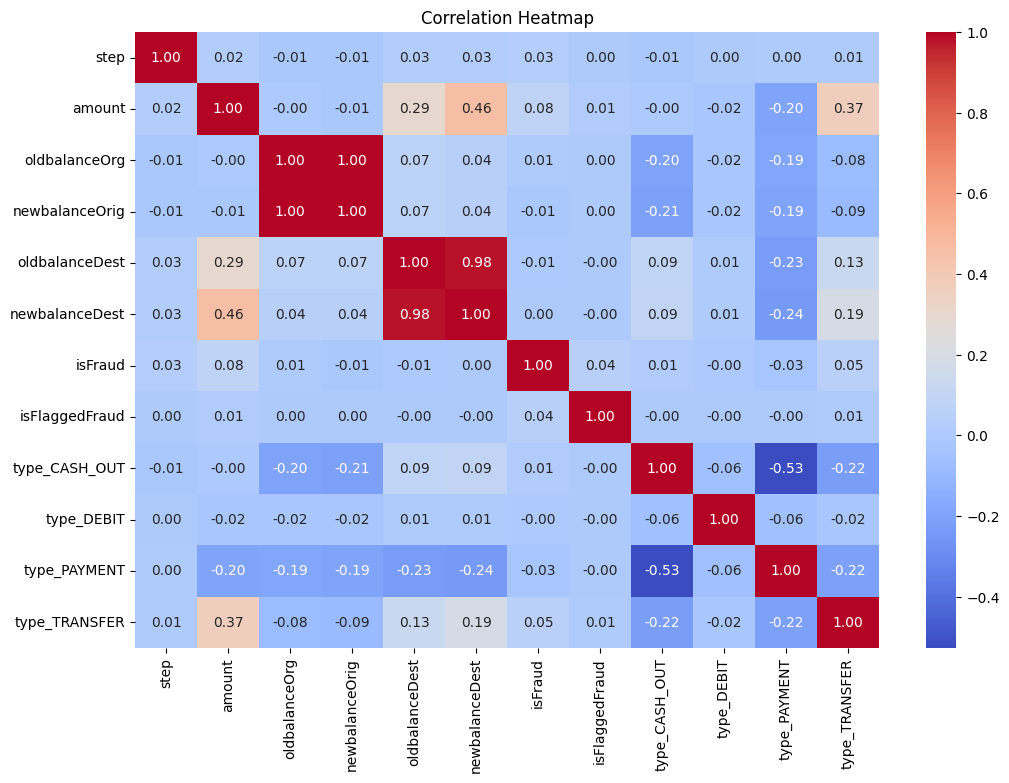

In [17]:

df_corr = pd.get_dummies(df, columns=['type'], drop_first=True)

# Drop identifiers
df_corr = df_corr.drop(['nameOrig', 'nameDest'], axis=1)

# Plot correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


EDA SUMMARY 
`. Class Imbalance:

- Only 8,213 out of 6.3 million transactions are fraudulent

- Fraud rate is approximately 0.13%, indicating severe imbalance

2.Transaction Types Distribution:

- Most common types: PAYMENT, TRANSFER, CASH_OUT

- Fraud occurs only in TRANSFER and CASH_OUT transactions
3.Fraud Rate by Transaction Type:
- TRANSFER has the highest fraud rate (~0.76%)

- CASH_OUT follows (~0.18%)

- No frauds observed in PAYMENT, DEBIT, or CASH_IN

4.Transaction Amount Patterns:

- Fraudulent transactions involve much higher amounts

- Median fraud amount is ~₹4.4 lakhs vs ₹75k for non-fraud
5.Fraud Over Time (step):

- Fraud increases significantly after step 400 (mid-month onward)

- Suggests fraud is concentrated in the later days of the simulation

6.Correlation Analysis:

- Features like amount and type_TRANSFER show positive correlation with isFraud

- Balance-related features are moderately informative






In [28]:
## Encoding
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

In [29]:
##  Drop Irrelevant Identifiers
df_encoded = df_encoded.drop(['step', 'nameOrig', 'nameDest'], axis=1)


## Handling the imbalanced feature(target feature)


In [30]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df_encoded.drop('isFraud', axis=1)
y = df_encoded['isFraud']

# Train-test split (70-30) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check shapes and fraud ratio
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Fraud % in y_train:\n", y_train.value_counts(normalize=True) * 100)



X_train shape: (4453834, 10)
X_test shape: (1908786, 10)
Fraud % in y_train:
 isFraud
0    99.87092
1     0.12908
Name: proportion, dtype: float64


In [31]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check shape and class balance
print("X_train shape after SMOTE:", X_train_smote.shape)
print("Fraud class balance after SMOTE:\n", y_train_smote.value_counts(normalize=True) * 100)


X_train shape after SMOTE: (8896170, 10)
Fraud class balance after SMOTE:
 isFraud
0    50.0
1    50.0
Name: proportion, dtype: float64


## Feature Selection

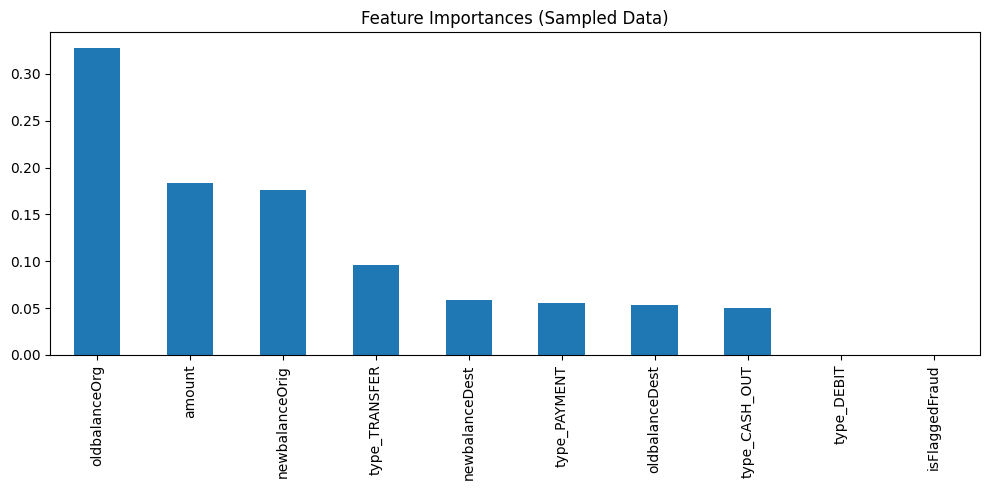

In [33]:
# Sample 10% of the SMOTE training data
X_sample = X_train_smote.sample(frac=0.1, random_state=42)
y_sample = y_train_smote.loc[X_sample.index]

# Train Random Forest on the smaller sample
temp_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
temp_rf.fit(X_sample, y_sample)

# Feature importances
importances = pd.Series(temp_rf.feature_importances_, index=X_sample.columns).sort_values(ascending=False)

# Plot
importances.plot(kind='bar', figsize=(10,5), title="Feature Importances (Sampled Data)")
plt.tight_layout()
plt.show()


## Dropping the unwanted feature

In [34]:
# Drop least useful columns
X_train_smote = X_train_smote.drop(['type_DEBIT', 'isFlaggedFraud'], axis=1)
X_test = X_test.drop(['type_DEBIT', 'isFlaggedFraud'], axis=1)


## Training the data

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_smote, y_train_smote)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluation metrics
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# AUC Score
y_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n ROC-AUC Score: {roc_auc:.4f}")


 Confusion Matrix:
[[1904878    1444]
 [    119    2345]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9992    0.9996   1906322
           1     0.6189    0.9517    0.7500      2464

    accuracy                         0.9992   1908786
   macro avg     0.8094    0.9755    0.8748   1908786
weighted avg     0.9994    0.9992    0.9993   1908786


 ROC-AUC Score: 0.9988
